## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import xgboost as xg
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

D:\Anaconda3\envs\myenv\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Data Preparation

In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
df.drop('url',axis=1,inplace=True)
df.shape

(39644, 60)

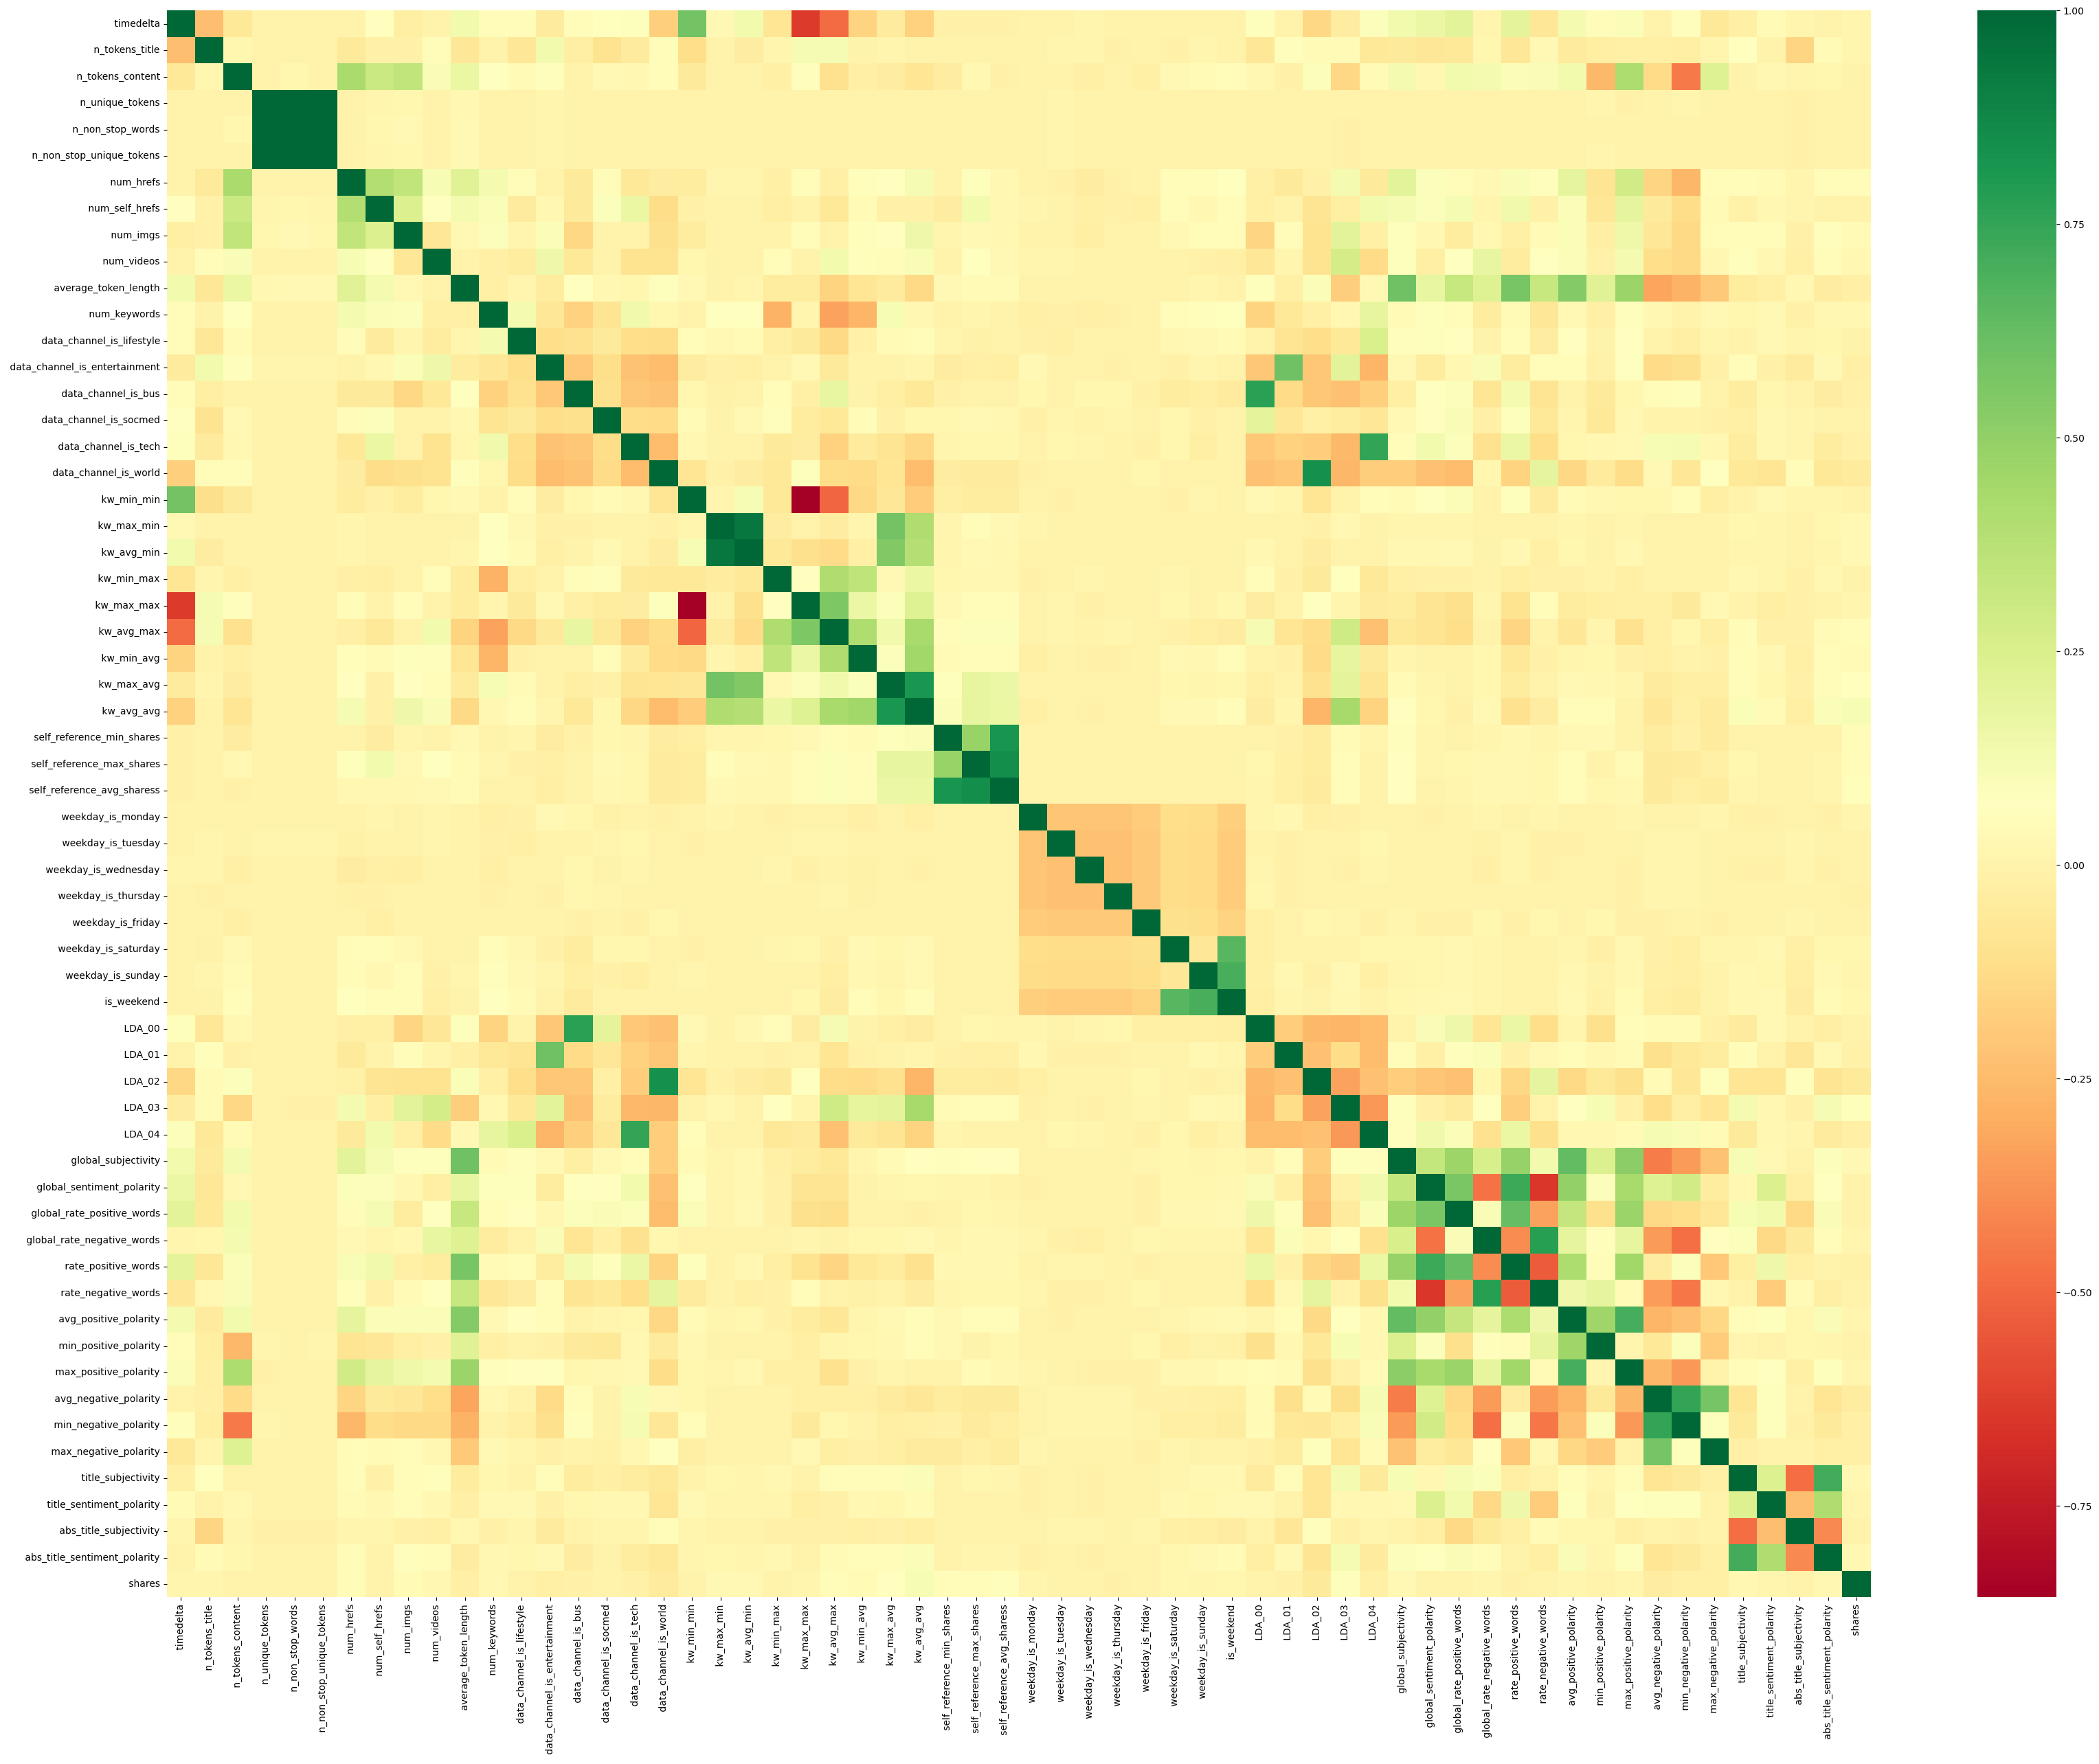

In [4]:
plt.figure(figsize=(40,30))
cor = df.corr(method ='pearson')
sns.heatmap(cor, cmap="RdYlGn")
plt.show()

In [5]:
corr_df = df.corr()

corr_cols = []

for col in corr_df.columns:
    cols = corr_df[col][corr_df[col] > 0.8].index.tolist()
#     cols.remove(col)
    corr_cols.append(cols)

corr_cols

[[' timedelta'],
 [' n_tokens_title'],
 [' n_tokens_content'],
 [' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens'],
 [' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens'],
 [' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens'],
 [' num_hrefs'],
 [' num_self_hrefs'],
 [' num_imgs'],
 [' num_videos'],
 [' average_token_length'],
 [' num_keywords'],
 [' data_channel_is_lifestyle'],
 [' data_channel_is_entertainment'],
 [' data_channel_is_bus'],
 [' data_channel_is_socmed'],
 [' data_channel_is_tech'],
 [' data_channel_is_world', ' LDA_02'],
 [' kw_min_min'],
 [' kw_max_min', ' kw_avg_min'],
 [' kw_max_min', ' kw_avg_min'],
 [' kw_min_max'],
 [' kw_max_max'],
 [' kw_avg_max'],
 [' kw_min_avg'],
 [' kw_max_avg', ' kw_avg_avg'],
 [' kw_max_avg', ' kw_avg_avg'],
 [' self_reference_min_shares', ' self_reference_avg_sharess'],
 [' self_reference_max_shares', ' self_reference_avg_sharess'],
 [' self_reference_min_shares',
  ' self_reference_m

In [6]:
df=df.drop([' n_non_stop_words',' n_unique_tokens',' kw_avg_min',' kw_avg_avg',' self_reference_avg_sharess'],axis=1)

## Normalization

In [7]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df)

In [8]:
df_mm = pd.DataFrame(x_scaled , columns = df.columns)
df_mm.head()

,timedelta,n_tokens_title,n_tokens_content,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,1.0,0.476190,0.025844,0.001254,0.013158,0.017241,0.007812,0.0,0.582024,0.444444,...,0.100000,0.7,0.650000,0.400,0.800000,0.500000,0.406250,0.000000,0.187500,0.000702
1,1.0,0.333333,0.030092,0.001218,0.009868,0.008621,0.007812,0.0,0.611043,0.333333,...,0.033333,0.7,0.881250,0.875,0.900000,0.000000,0.500000,1.000000,0.000000,0.000842
2,1.0,0.333333,0.024900,0.001021,0.009868,0.008621,0.007812,0.0,0.546334,0.555556,...,0.100000,1.0,0.533333,0.200,0.866667,0.000000,0.500000,1.000000,0.000000,0.001778
3,1.0,0.333333,0.062662,0.001024,0.029605,0.000000,0.007812,0.0,0.547768,0.666667,...,0.136364,0.8,0.630303,0.400,0.833333,0.000000,0.500000,1.000000,0.000000,0.001422
4,1.0,0.523810,0.126505,0.000832,0.062500,0.163793,0.156250,0.0,0.582331,0.666667,...,0.033333,1.0,0.779808,0.500,0.950000,0.454545,0.568182,0.090909,0.136364,0.000598


## Dimensionality Reduction
### (Optional)

In [9]:
# X = df_mm.drop(' shares',axis=1)
# Y = df_mm[[' shares']]

# model = xg.XGBRegressor(n_estimators = 50)
# rfecv = RFECV(estimator = model , step = 1 , cv = 5 , scoring = 'neg_mean_absolute_error')
# refcv = rfecv.fit(X , Y)

In [10]:
# print('Optimal Number Of Features: ' , rfecv.n_features_)
# print('Optimal Features: ' , X.columns[rfecv.support_])

## Model Selection

In [11]:
# X_rfecv = df_mm[X.columns[rfecv.support_]]
X = df_mm.drop(' shares',axis=1)
Y = df_mm[[' shares']]

In [12]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X , Y , test_size = 0.2 , random_state = 44)

In [13]:
models  =  [('XGR',xg.XGBRegressor),('LR',LinearRegression),
            ('SVR',SVR),('RFR',RandomForestRegressor)]

#You can add more models like lasso,ridge,catboost,adaboost,gradientboost

In [14]:
for name , model in models:
    model = model()
    model.fit(X_Train,Y_Train)
    pred = model.predict(X_Test)
    error = mean_squared_error(pred,Y_Test)
    print(error)

0.0003135778785780882
1863088300184.3286
0.004565845932737944
0.00029317378701886846


In [21]:
# Using RFECV gives xgboost as best model

## Finding No.of Estimators

In [18]:
errors= []
estimators = [10,30,50,80]
for est in estimators:
    print(f'------------{est}-----------')
    rfr = RandomForestRegressor(n_estimators = est)
    rfr.fit(X_Train, Y_Train)

    pred = rfr.predict(X_Test)
    true = Y_Test
    error = mean_squared_error(true , pred)
    errors.append(error)

------------10-----------
------------30-----------
------------50-----------
------------80-----------


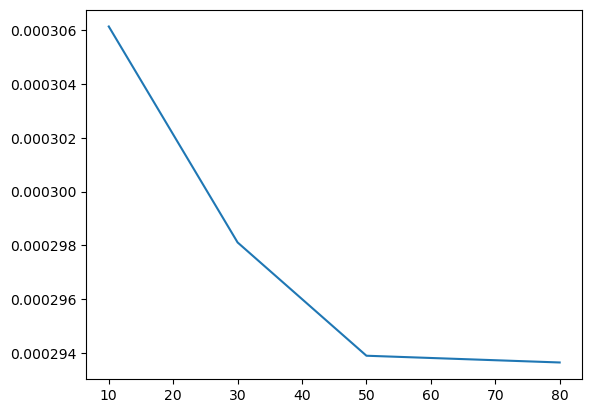

In [19]:
plt.plot(estimators ,  errors)
plt.show()

In [22]:
# Can use more estimators.....It takes some more time

## Prediction

In [20]:
model = RandomForestRegressor(n_estimators = 80)
model.fit(X_Train, Y_Train)

pred = model.predict(X_Test)
true = Y_Test
mean_squared_error(true , pred)

0.00029267658938336374